In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [67]:
df = pd.read_excel("/content/Tweets_Dataset.xlsx")

In [68]:
df = df.sample(frac = 1)

In [69]:
df.head()

,contributors,coordinates,text,user/time_zone,user/profile_background_image_url,user/geo_enabled,user/profile_image_url_https,user/url,user/profile_text_color,user/entities/url/urls/0/url,user/entities/url/urls/0/indices/0,user/entities/url/urls/0/indices/1,user/entities/url/urls/0/expanded_url,user/entities/url/urls/0/display_url,user/entities/description/urls/0/url,user/entities/description/urls/0/indices/0,user/entities/description/urls/0/indices/1,user/entities/description/urls/0/expanded_url,user/entities/description/urls/0/display_url,user/listed_count,user/statuses_count,user/profile_sidebar_fill_color,user/profile_sidebar_border_color,user/name,user/followers_count,user/location,user/lang,user/profile_background_image_url_https,user/verified,user/notifications,user/default_profile_image,user/profile_use_background_image,user/created_at,user/favourites_count,user/friends_count,user/has_extended_profile,user/utc_offset,user/profile_background_color,user/is_translator,user/contributors_enabled,...,quoted_status/entities/user_mentions/8/name,quoted_status/entities/user_mentions/9/screen_name,quoted_status/entities/user_mentions/9/indices/0,quoted_status/entities/user_mentions/9/indices/1,quoted_status/entities/user_mentions/9/id_str,quoted_status/entities/user_mentions/9/id,quoted_status/entities/user_mentions/9/name,quoted_status/geo/coordinates/0,quoted_status/geo/coordinates/1,quoted_status/geo/type,entities/urls/2/url,entities/urls/2/indices/0,entities/urls/2/indices/1,entities/urls/2/expanded_url,entities/urls/2/display_url,quoted_status/entities/hashtags/4/indices/0,quoted_status/entities/hashtags/4/indices/1,quoted_status/entities/hashtags/4/text,quoted_status/entities/urls/1/url,quoted_status/entities/urls/1/indices/0,quoted_status/entities/urls/1/indices/1,quoted_status/entities/urls/1/expanded_url,quoted_status/entities/urls/1/display_url,quoted_status/scopes/followers,entities/user_mentions/10/screen_name,entities/user_mentions/10/indices/0,entities/user_mentions/10/indices/1,entities/user_mentions/10/id_str,entities/user_mentions/10/id,entities/user_mentions/10/name,quoted_status/entities/hashtags/5/indices/0,quoted_status/entities/hashtags/5/indices/1,quoted_status/entities/hashtags/5/text,quoted_status/entities/hashtags/6/indices/0,quoted_status/entities/hashtags/6/indices/1,quoted_status/entities/hashtags/6/text,Unnamed: 471,Unnamed: 472,Unnamed: 473,result
5575,NaN,NaN,zamn the line up for afropunk fest brooklyn :(,Bihntiy,Paris,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,false,http://t.co/IY2pdxueOq,080708,false,12.0,7200,FFFFFF,bihntiy,1278.0,934.0,Paris,false,false,https://pbs.twimg.com/profile_images/593081752...,false,http://pbs.twimg.com/profile_images/5930817526...,fr,30233,384,https://pbs.twimg.com/profile_banners/65356702...,true,False,False,FFFFFF,Thu Aug 13 13:02:31 +0000 2009,false,ABB8C2,false,False,65356702.0,false,ABB8C2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
541,NaN,NaN,@UptownJavin @ChloeeElmoree @Eymvnique family ...,Pacific Time (US & Canada),http://abs.twimg.com/images/themes/theme1/bg.png,true,https://pbs.twimg.com/profile_images/620750652...,NaN,333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,9473,DDEEF6,C0DEED,døp3,501,NaN,en,https://abs.twimg.com/images/themes/theme1/bg.png,False,False,false,true,Thu Nov 29 00:59:07 +0000 2012,1291,423,False,-25200.0,C0DEED,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
4200,NaN,NaN,@MLGJordanD congrats on 100k Man. Can't wait t...,Pacific Time (US & Canada),http://pbs.twimg.com/profile_background_images...,true,https://pbs.twimg.com/profile_images/616935160...,http://t.co/44LXAiTnZI,333333,http://t.co/44LXAiTnZI,0,22.0,http://Tw

In [70]:
df.columns

Index(['contributors', 'coordinates', 'text', 'user/time_zone',
       'user/profile_background_image_url', 'user/geo_enabled',
       'user/profile_image_url_https', 'user/url', 'user/profile_text_color',
       'user/entities/url/urls/0/url',
       ...
       'quoted_status/entities/hashtags/5/indices/0',
       'quoted_status/entities/hashtags/5/indices/1',
       'quoted_status/entities/hashtags/5/text',
       'quoted_status/entities/hashtags/6/indices/0',
       'quoted_status/entities/hashtags/6/indices/1',
       'quoted_status/entities/hashtags/6/text', 'Unnamed: 471',
       'Unnamed: 472', 'Unnamed: 473', 'result'],
      dtype='object', length=475)

In [71]:
tweet_df = df[['text','result']]
print(tweet_df.shape)
tweet_df.head(5)

(10000, 2)


,text,result
5575,zamn the line up for afropunk fest brooklyn :(,negative
541,@UptownJavin @ChloeeElmoree @Eymvnique family ...,positive
4200,@MLGJordanD congrats on 100k Man. Can't wait t...,positive
734,@ChaSilveo follow @jnlazts &amp; http://t.co/...,positive
837,@moonlight69 well you're in for a wild ride &g...,positive


In [72]:
tweet_df["result"].value_counts()

negative    5000
positive    5000
Name: result, dtype: int64

In [73]:
sentiment_label = tweet_df.result.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 0]),
 Index(['negative', 'positive'], dtype='object'))

In [74]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [75]:
print(tokenizer.word_index)

{'i': 1, 'you': 2, 'to': 3, 'the': 4, 't': 5, 'co': 6, 'a': 7, 'and': 8, 'my': 9, 'http': 10, 'for': 11, 'me': 12, 'it': 13, 'in': 14, 'is': 15, 'so': 16, 'of': 17, 'have': 18, 'd': 19, 'on': 20, 'this': 21, 'but': 22, 'that': 23, "i'm": 24, 'https': 25, 'be': 26, 'thanks': 27, 'your': 28, 'no': 29, 'follow': 30, 'not': 31, 'u': 32, 'just': 33, 'like': 34, 'all': 35, 'love': 36, 'with': 37, 'we': 38, 'was': 39, 'please': 40, 'are': 41, 'at': 42, 'too': 43, 'get': 44, "it's": 45, 'can': 46, 'good': 47, 'do': 48, 'up': 49, 'day': 50, 'now': 51, 'want': 52, 'back': 53, 'know': 54, 'if': 55, 'will': 56, 'amp': 57, 'see': 58, 'thank': 59, 'one': 60, 'miss': 61, "don't": 62, 'time': 63, 'what': 64, '3': 65, 'out': 66, 'when': 67, 'much': 68, "can't": 69, 'happy': 70, 'today': 71, 'go': 72, 'about': 73, 'really': 74, 'why': 75, 'hi': 76, 'from': 77, 'new': 78, 'lt': 79, 'hope': 80, 'more': 81, 'great': 82, 'our': 83, 'they': 84, 'im': 85, 'he': 86, 'how': 87, 'here': 88, 'there': 89, 'am': 90

In [76]:
print(tweet[0])
print(encoded_docs[0])

zamn the line up for afropunk fest brooklyn :(
[4, 726, 49, 11, 2463]


In [77]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    4
  726 

In [78]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           690240    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 706,891
Trainable params: 706,891
Non-trainable params: 0
________________________________________________

In [93]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=11, batch_size=32)

Epoch 1/11
250/250 [==============================] - 49s 192ms/step - loss: 0.2040 - accuracy: 0.9255 - val_loss: 0.6319 - val_accuracy: 0.7830
Epoch 2/11
250/250 [==============================] - 48s 192ms/step - loss: 0.1804 - accuracy: 0.9315 - val_loss: 0.6429 - val_accuracy: 0.7835
Epoch 3/11
250/250 [==============================] - 48s 191ms/step - loss: 0.1665 - accuracy: 0.9380 - val_loss: 0.6898 - val_accuracy: 0.7875
Epoch 4/11
250/250 [==============================] - 47s 189ms/step - loss: 0.1584 - accuracy: 0.9356 - val_loss: 0.6839 - val_accuracy: 0.7790
Epoch 5/11
250/250 [==============================] - 47s 188ms/step - loss: 0.1460 - accuracy: 0.9410 - val_loss: 0.7114 - val_accuracy: 0.7830
Epoch 6/11
250/250 [==============================] - 47s 188ms/step - loss: 0.1398 - accuracy: 0.9442 - val_loss: 0.7247 - val_accuracy: 0.7825
Epoch 7/11
250/250 [==============================] - 47s 187ms/step - loss: 0.1333 - accuracy: 0.9471 - val_loss: 0.8340 - val_ac

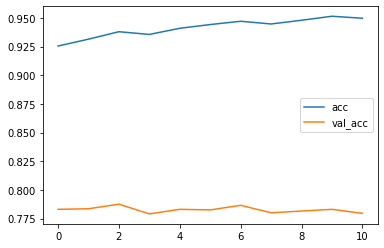

<Figure size 432x288 with 0 Axes>

In [94]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

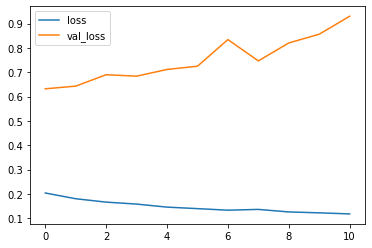

<Figure size 432x288 with 0 Axes>

In [95]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [96]:
acc = history.history["accuracy"]
accuracy = sum(acc)/len(acc)

In [97]:
accuracy

0.9415454593571749

In [98]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [99]:
test_sentence1 = "The journey is uncomfortable"
predict_sentiment(test_sentence1)

test_sentence2 = "@My mobi has exploded!"
predict_sentiment(test_sentence2)

Predicted label:  negative
Predicted label:  negative
